<a href="https://colab.research.google.com/github/aedupuga2-boop/akash-/blob/main/Face_Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib


In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [3]:
import zipfile
import os

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

print("Dataset extracted!")

Dataset extracted!


In [4]:
print('/content/dataset/train/')
print('/content/dataset/test/')

/content/dataset/train/
/content/dataset/test/


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

img_size = 48
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20
)

model.save("emotion_model.h5")

print("Model trained and saved!")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 184s 401ms/step - accuracy: 0.2008 - loss: 2.5580 - val_accuracy: 0.2552 - val_loss: 2.3319
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.2432 - loss: 1.8330 - val_accuracy: 0.3390 - val_loss: 1.7078
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.2782 - loss: 1.7729 - val_accuracy: 0.3568 - val_loss: 1.6472
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 176s 393ms/step - accuracy: 0.2960 - loss: 1.7470 - val_accuracy: 0.3665 - val_loss: 1.6245
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 170s 379ms/step - accuracy: 0.3066 - loss: 1.7213 - val_accuracy: 0.3821 - val_loss: 1.5899
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 177s 394ms/step - accuracy: 0.3347 - loss: 1.6843 - val_accuracy: 0.3898 - val_loss: 1.5777
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 176s 392ms/step - accuracy: 0.3433 - loss: 1.6670 - val_accuracy: 0.4015 - val_loss: 1.5431
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 173s 385ms/step - accuracy: 0.3495 -

Model trained and saved!


In [6]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=2
)

Epoch 1/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 176s 391ms/step - accuracy: 0.4411 - loss: 1.4538 - val_accuracy: 0.4863 - val_loss: 1.3334
Epoch 2/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 201s 390ms/step - accuracy: 0.4425 - loss: 1.4424 - val_accuracy: 0.5007 - val_loss: 1.3000


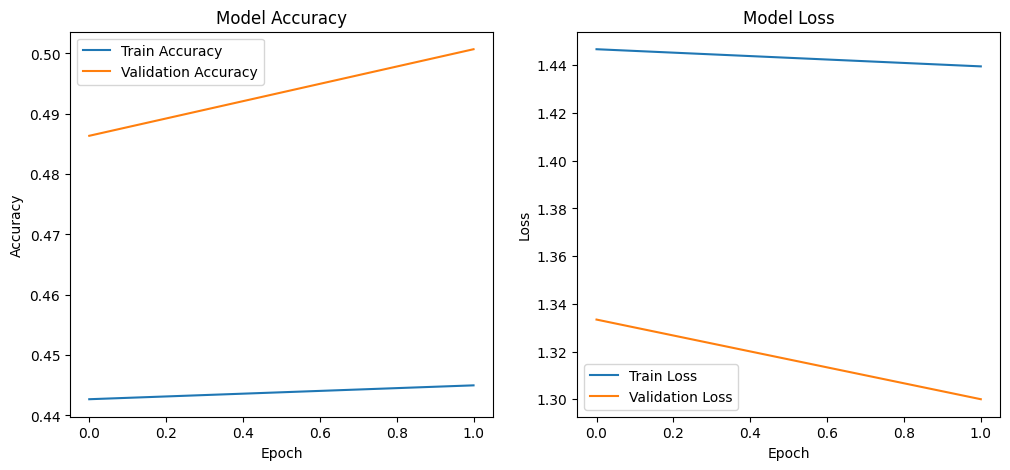

In [7]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

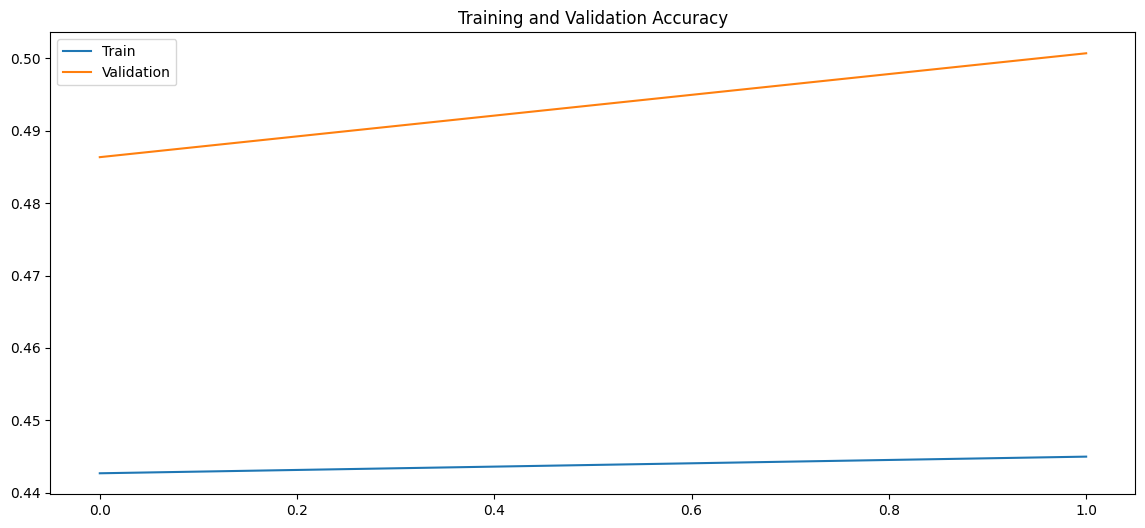

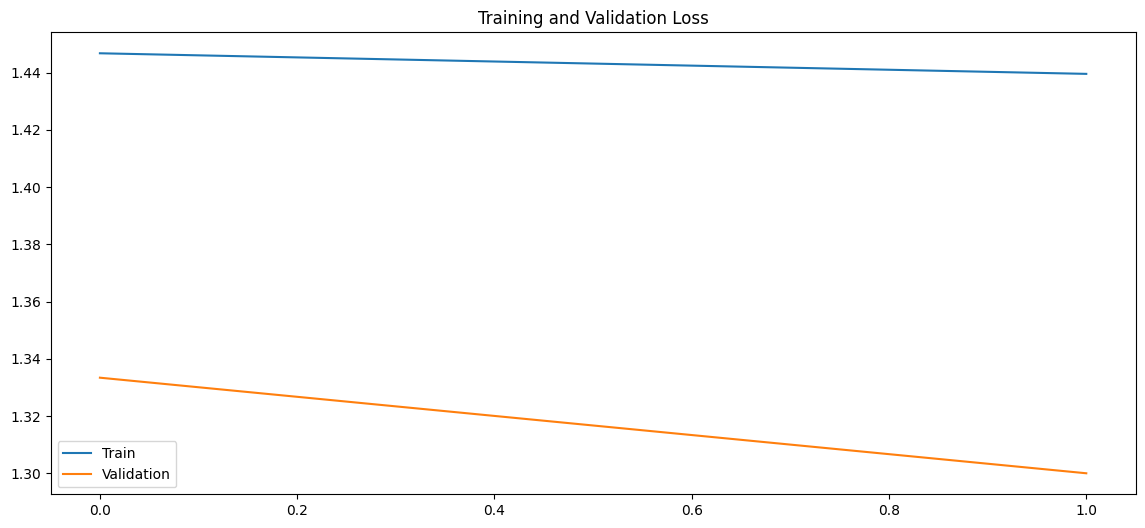

In [8]:
plt.figure(figsize=(14,6))

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.legend(['Train','Validation'])
plt.show()

# Loss
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.legend(['Train','Validation'])
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()


Saving DMUbjq2UjJcG3umGv3Qjjd.jpeg to DMUbjq2UjJcG3umGv3Qjjd.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted Emotion: Angry


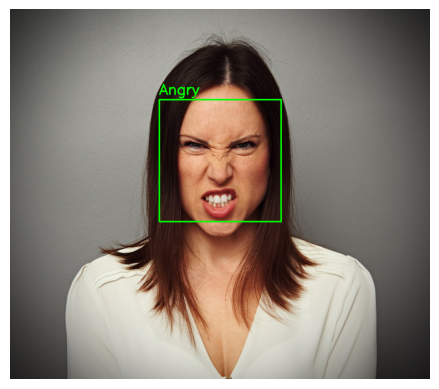

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("emotion_model.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi_gray = roi_gray/255.0
    roi_gray = np.reshape(roi_gray,(1,48,48,1))

    prediction = model.predict(roi_gray)
    emotion = emotion_labels[np.argmax(prediction)]

    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image, emotion, (x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9,(0,255,0),2)

    print("Predicted Emotion:", emotion)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [11]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Emotion: Happy


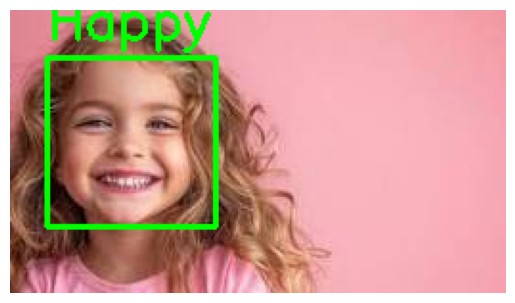

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("emotion_model.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi_gray = roi_gray/255.0
    roi_gray = np.reshape(roi_gray,(1,48,48,1))

    prediction = model.predict(roi_gray)
    emotion = emotion_labels[np.argmax(prediction)]

    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image, emotion, (x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9,(0,255,0),2)

    print("Predicted Emotion:", emotion)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [21]:
from google.colab import files
uploaded = files.upload()

Saving 8531-mouni-roy-mrunal-thakur-and-pooja-hegde-snapped-attending-ramesh-s-tauranis-diwali-bash.webp to 8531-mouni-roy-mrunal-thakur-and-pooja-hegde-snapped-attending-ramesh-s-tauranis-diwali-bash (1).webp


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Emotion: Sad


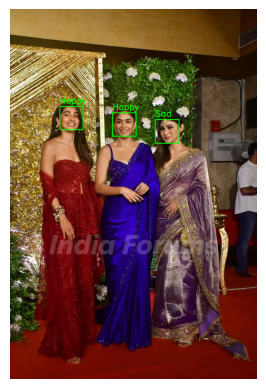

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("emotion_model.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi_gray = roi_gray/255.0
    roi_gray = np.reshape(roi_gray,(1,48,48,1))

    prediction = model.predict(roi_gray)
    emotion = emotion_labels[np.argmax(prediction)]

    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image, emotion, (x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9,(0,255,0),2)

    print("Predicted Emotion:", emotion)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [24]:
from google.colab import files
uploaded = files.upload()

Saving 63908459.avif to 63908459 (1).avif


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Emotion: Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Emotion: Happy


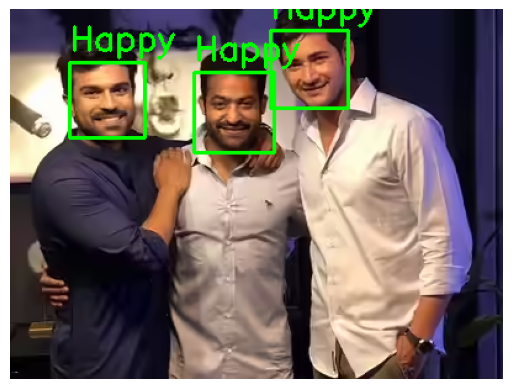

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("emotion_model.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48))
    roi_gray = roi_gray/255.0
    roi_gray = np.reshape(roi_gray,(1,48,48,1))

    prediction = model.predict(roi_gray)
    emotion = emotion_labels[np.argmax(prediction)]

    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image, emotion, (x,y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9,(0,255,0),2)

    print("Predicted Emotion:", emotion)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()